In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
qbo_file = pd.read_csv("data/qbo.txt", sep = "\t")
qbo_file['mon'] = np.linspace(1,770,770, dtype = np.int)

In [3]:
qbo_file

,YYMM,70hPa,50hPa,40hPa,30hPa,20hPa,15hPa,10hPa,mon
0,5601,38,80,57,-22,-152,-280,-250,1
1,5602,65,68,37,-62,-170,-283,-290,2
2,5603,90,95,24,-112,-195,-302,-300,3
3,5604,152,85,-53,-224,-251,-280,-270,4
4,5605,152,-8,-161,-222,-230,-260,-200,5
...,...,...,...,...,...,...,...,...,...
765,1910,49,23,52,71,-102,-203,-305,766
766,1911,65,28,34,73,-192,-251,-289,767
767,1912,66,45,5,48,-250,-265,-291,768
768,2001,41,22,-63,37,-262,-301,-307,769


In [4]:
qbo_file.loc[qbo_file['mon'].between(1, 770, inclusive=True)]

,YYMM,70hPa,50hPa,40hPa,30hPa,20hPa,15hPa,10hPa,mon
0,5601,38,80,57,-22,-152,-280,-250,1
1,5602,65,68,37,-62,-170,-283,-290,2
2,5603,90,95,24,-112,-195,-302,-300,3
3,5604,152,85,-53,-224,-251,-280,-270,4
4,5605,152,-8,-161,-222,-230,-260,-200,5
...,...,...,...,...,...,...,...,...,...
765,1910,49,23,52,71,-102,-203,-305,766
766,1911,65,28,34,73,-192,-251,-289,767
767,1912,66,45,5,48,-250,-265,-291,768
768,2001,41,22,-63,37,-262,-301,-307,769


In [5]:
pres = [70,50,40,30,20,15,10]
mon = qbo_file['mon']
qbo_da = xr.DataArray(data = qbo_file.iloc[:,1:8], coords = [mon, pres], dims = ['mon', 'pres'])
qbo_da = qbo_da*0.1
qbo_da = qbo_da.transpose()

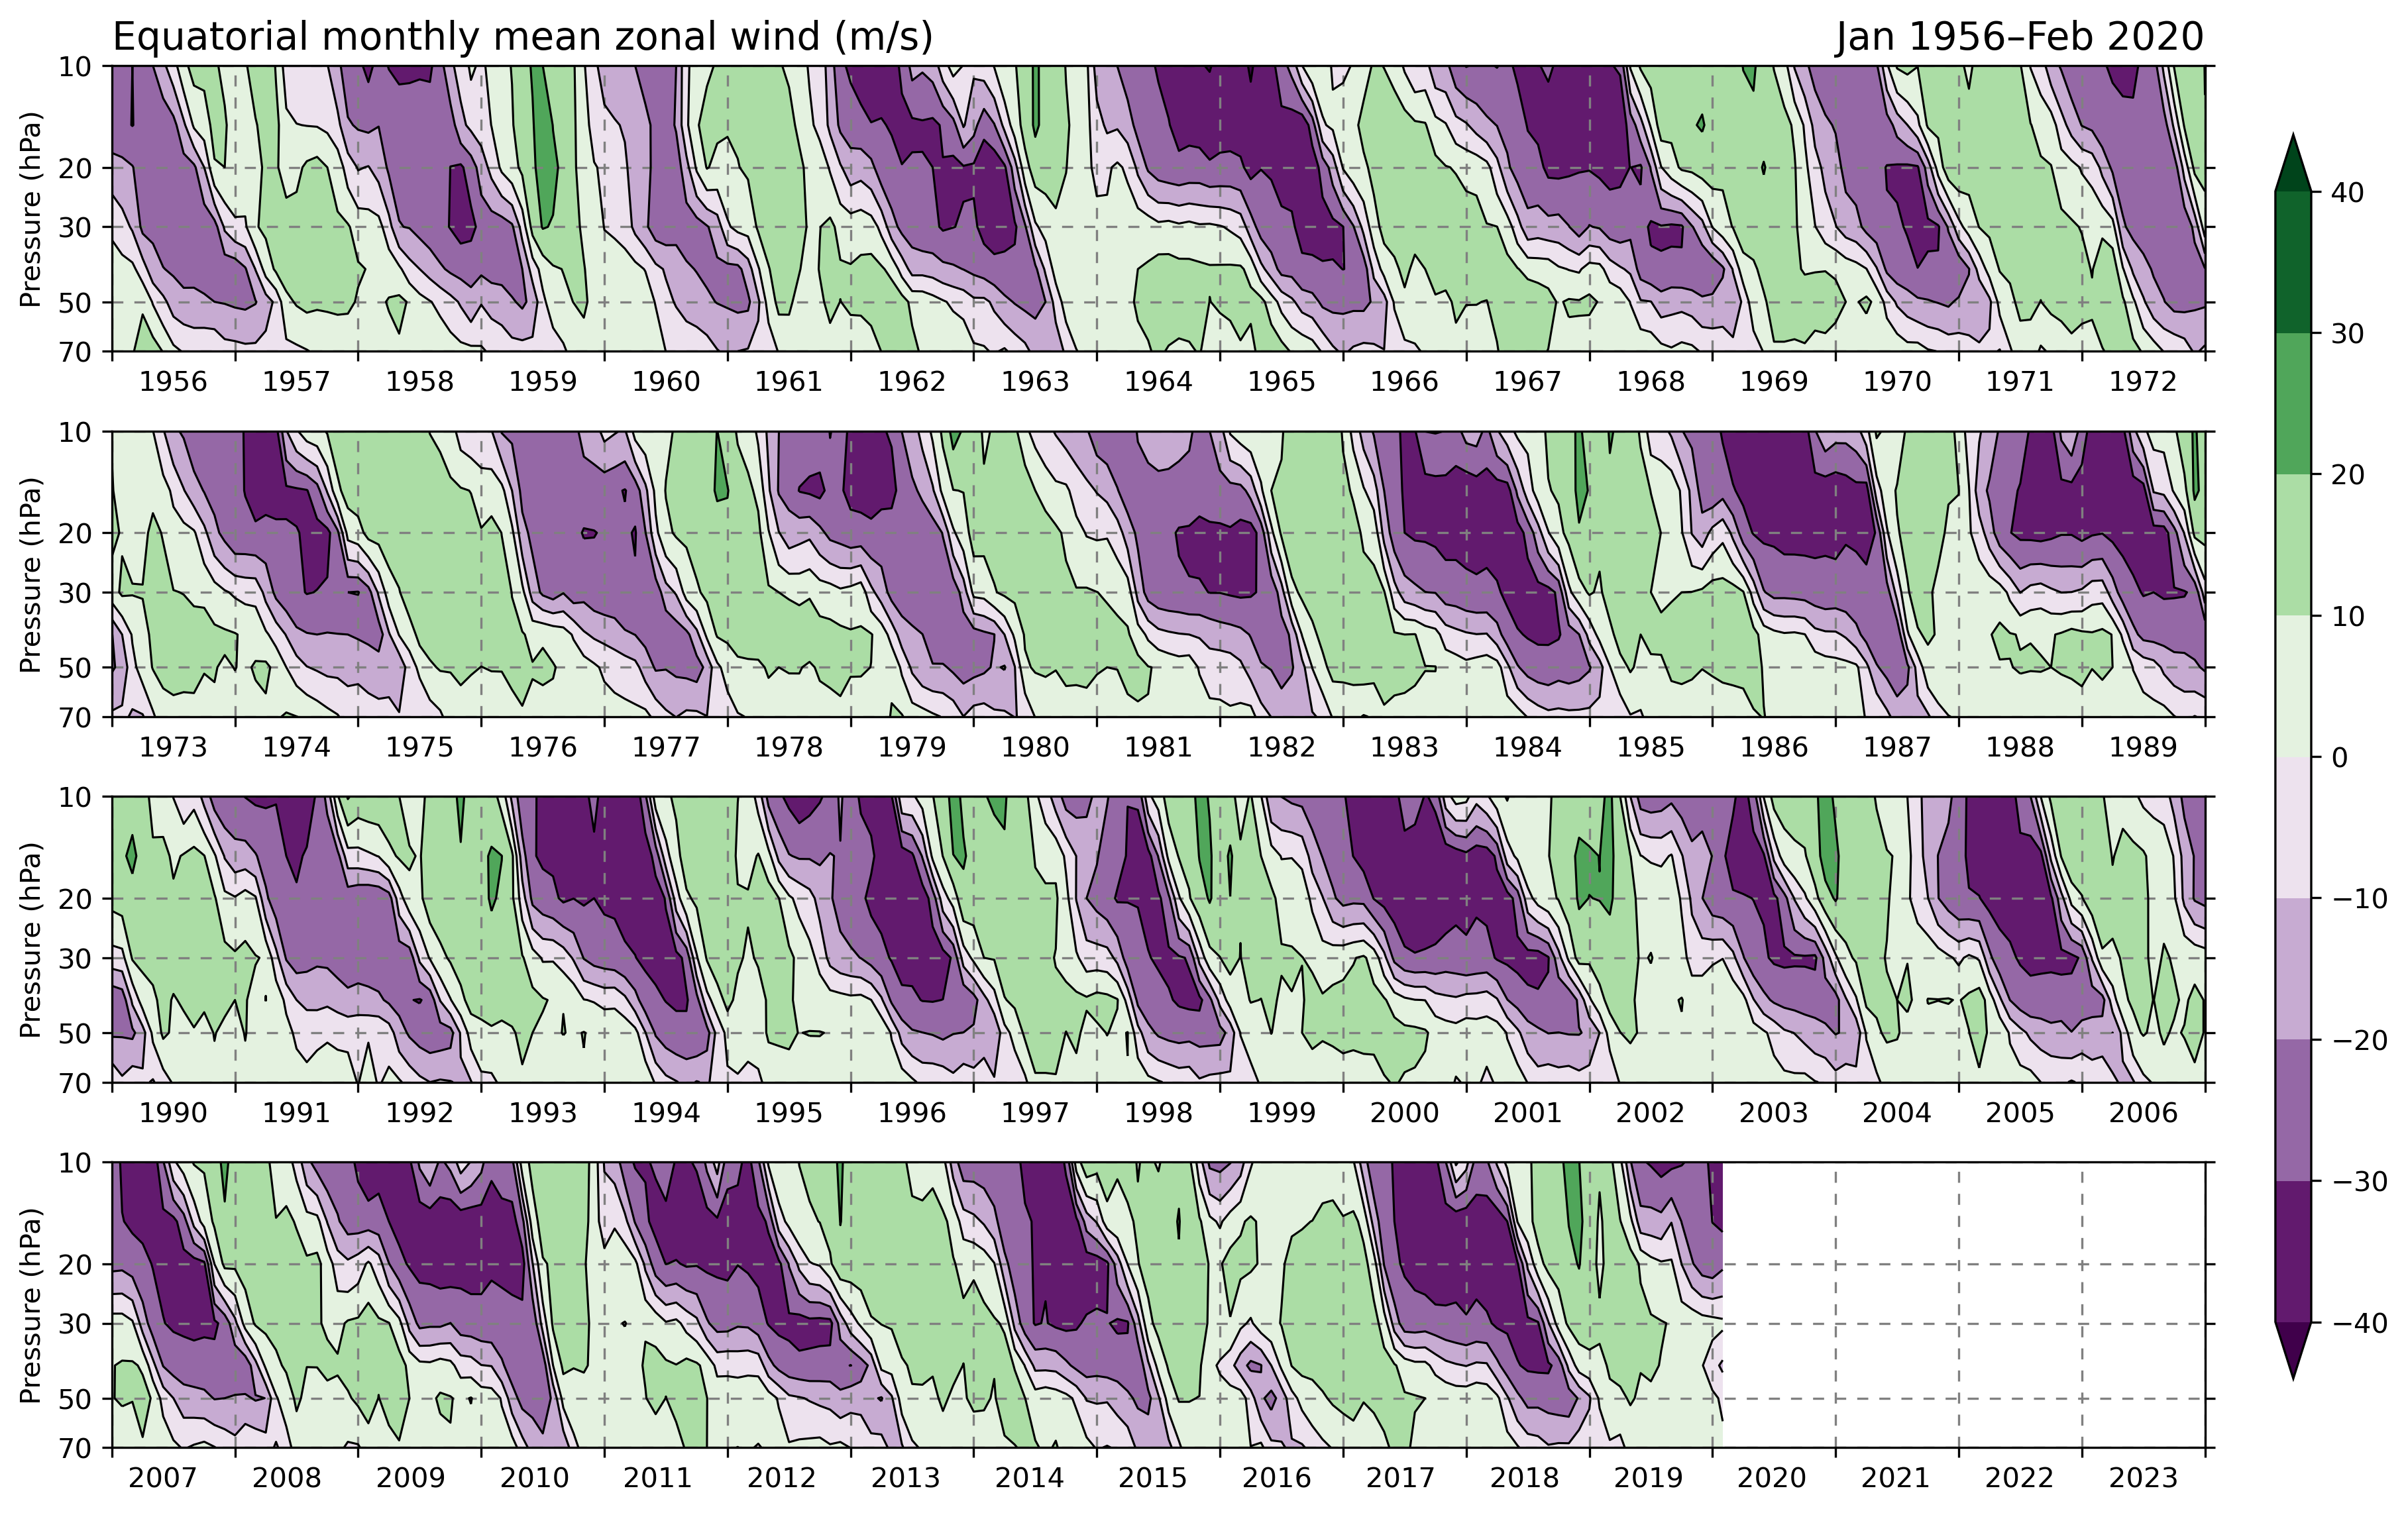

In [8]:
fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize = (12,7.5), constrained_layout = True, dpi = 300)

qbo_da_0 = qbo_da.sel(mon = slice(1,205))
qbo_da_1 = qbo_da.sel(mon = slice(205,409))
qbo_da_2 = qbo_da.sel(mon = slice(409,613))
qbo_da_3 = qbo_da.sel(mon = slice(613,770))

levels = np.arange(-40,50,10)

f0 = ax[0].contourf(qbo_da_0.mon, qbo_da_0.pres, qbo_da_0, cmap = "PRGn", levels = levels, extend = 'both', extent = (0.5,205,70,10))
f1 = ax[1].contourf(qbo_da_1.mon, qbo_da_1.pres, qbo_da_1, cmap = "PRGn", levels = levels, extend = 'both')
f2 = ax[2].contourf(qbo_da_2.mon, qbo_da_2.pres, qbo_da_2, cmap = "PRGn", levels = levels, extend = 'both')
f3 = ax[3].contourf(qbo_da_3.mon, qbo_da_3.pres, qbo_da_3, cmap = "PRGn", levels = levels, extend = 'both')

ax[3].set_xlim(613,817)

c0 = ax[0].contour(qbo_da_0.mon, qbo_da_0.pres, qbo_da_0, colors = "black", linewidths = 0.75, linestyles = "solid", levels = levels)
c1 = ax[1].contour(qbo_da_1.mon, qbo_da_1.pres, qbo_da_1, colors = "black", linewidths = 0.75, linestyles = "solid", levels = levels)
c2 = ax[2].contour(qbo_da_2.mon, qbo_da_2.pres, qbo_da_2, colors = "black", linewidths = 0.75, linestyles = "solid", levels = levels)
c3 = ax[3].contour(qbo_da_3.mon, qbo_da_3.pres, qbo_da_3, colors = "black", linewidths = 0.75, linestyles = "solid", levels = levels)

ax[0].set_xticks(np.linspace(1,205,18), minor = False)
ax[1].set_xticks(np.linspace(205,409,18), minor = False)
ax[2].set_xticks(np.linspace(409,613,18), minor = False)
ax[3].set_xticks(np.linspace(613,817,18), minor = False)

ax[0].set_xticks(np.linspace(7,199,17), minor = True)
ax[0].set_xticklabels(np.arange(1956,1973,1), minor = True)

ax[1].set_xticks(np.linspace(211,403,17), minor = True)
ax[1].set_xticklabels(np.arange(1973,1990,1), minor = True)

ax[2].set_xticks(np.linspace(415,607,17), minor = True)
ax[2].set_xticklabels(np.arange(1990,2007,1), minor = True)

ax[3].set_xticks(np.linspace(618,811,17), minor = True)
ax[3].set_xticklabels(np.arange(2007,2024,1), minor = True)

axlist = ax.flatten()
for ax_i in axlist:
    ax_i.set_ylim(70,10)
    ax_i.set_yscale('log')
    ax_i.set_yticks([70,50,30,20,10])
    ax_i.set_yticklabels([70,50,30,20,10])
    ax_i.tick_params(axis = 'y', which = 'minor', left = False)
    ax_i.set_yticklabels([], minor = True)
    ax_i.tick_params(axis = 'y', right = True)
    ax_i.set_ylabel("Pressure (hPa)")
    ax_i.grid(linestyle=(0, (5, 5)), color= "grey")
    ax_i.tick_params(axis = 'x', which = 'minor', length = 3.5, width = 0)
    ax_i.set_xticklabels([], minor = False)

fig.colorbar(f0, ax = ax, aspect = 50, shrink = 0.9)
ax[0].set_title("Equatorial monthly mean zonal wind (m/s)", loc = "left", fontsize = 14)
ax[0].set_title("Jan 1956–Feb 2020", loc = "right", fontsize = 14)
#plt.show()
plt.savefig("figures/qbo.svg")

In [7]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] 

3.5